In [47]:
import numpy as np
import pandas as pd
import pylab as pl

baseball = pd.read_csv("http://bit.ly/144sh7t")


In [48]:
baseball.head()

,id,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
1,forceda01,1871,1,WS3,NaN,32,162,45,45,9,...,29.0,8.0,0.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,mathebo01,1871,1,FW1,NaN,19,89,15,24,3,...,10.0,2.0,1.0,2,0.0,NaN,NaN,NaN,NaN,NaN
3,startjo01,1871,1,NY2,NaN,33,161,35,58,5,...,34.0,4.0,2.0,3,0.0,NaN,NaN,NaN,NaN,NaN
4,suttoez01,1871,1,CL1,NaN,29,128,35,45,3,...,23.0,3.0,1.0,1,0.0,NaN,NaN,NaN,NaN,NaN


In [49]:
baseball.shape

(21699, 22)

In [50]:
# group by year and get a summary of each numeric column
# group by year and get a summary of each numeric column
baseball.groupby(["year"]).describe().head()


X2b                                                   X3b            \
     count      mean       std  min  25%   50%   75%   max count      mean   
year                                                                         
1871   7.0  6.000000  3.000000  3.0  4.0   5.0   7.5  11.0   7.0  4.000000   
1872  13.0  4.307692  3.772369  0.0  2.0   3.0   6.0  11.0  13.0  1.307692   
1873  13.0  7.769231  4.850324  2.0  4.0   7.0   9.0  19.0  13.0  2.769231   
1874  15.0  6.800000  4.693460  0.0  4.0   7.0  10.0  15.0  15.0  2.933333   
1875  17.0  9.882353  6.679094  0.0  6.0  10.0  14.0  23.0  17.0  3.529412   

     ...    so       stint                                               
     ...   75%   max count      mean       std  min  25%  50%  75%  max  
year ...                                                                 
1871 ...   1.0   1.0   7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1872 ...   2.0   3.0  13.0  1.153846  0.375534  1.0  1.0  1.0  1.0  2.0  
1873 ...   3.0   5.0  13.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1874 ...   4.0   5.0  15.0  1.066667  0.258199  1.0  1.0  1.0  1.0  2.0  
1875 ...   5.0  13.0  17.0  1.058824  0.242536  1.0  1.0  1.0  1.0  2.0  

[5 rows x 144 columns]

In [51]:
# for each year, get the mean of each column
baseball.groupby(["year"]).aggregate(np.mean).head()


,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,,,,,,,,,,,,,,,,,,
1871,1.000000,28.000000,135.857143,33.571429,42.142857,6.000000,4.000000,1.000000,22.285714,3.857143,1.428571,3.571429,0.428571,NaN,NaN,NaN,NaN,NaN
1872,1.153846,29.461538,140.846154,32.153846,42.923077,4.307692,1.307692,0.076923,20.538462,1.538462,1.076923,2.692308,1.000000,NaN,NaN,NaN,NaN,NaN
1873,1.000000,46.307692,217.615385,48.461538,68.538462,7.769231,2.769231,0.538462,30.923077,1.692308,1.076923,4.538462,2.076923,NaN,NaN,NaN,NaN,NaN
1874,1.066667,49.000000,226.733333,44.000000,64.866667,6.800000,2.933333,0.866667,29.000000,3.333333,0.466667,2.800000,2.333333,NaN,NaN,NaN,NaN,NaN
1875,1.058824,57.823529,256.941176,47.176471,73.294118,9.882353,3.529412,0.764706,31.588235,5.705882,4.235294,2.882353,3.470588,NaN,NaN,NaN,NaN,NaN


In [52]:
# you can create group objects
baseball_grouped = baseball.groupby(["year"])


In [53]:
# getting the count of rows for each league
baseball.groupby("lg").size()

lg
AA      171
AL    10007
FL       37
NL    11378
PL       32
UA        9
dtype: int64

In [54]:
# records per year
baseball.groupby(["year"]).size().head()

year
1871     7
1872    13
1873    13
1874    15
1875    17
dtype: int64

In [55]:
def analyze(df):
 return pd.Series({"nrow": len(df), "ncol": len(df.columns)})
# rows and columns per league
baseball.groupby("lg").apply(analyze)

,ncol,nrow
lg,,
AA,22,171
AL,22,10007
FL,22,37
NL,22,11378
PL,22,32
UA,22,9


In [56]:
# aggregate over year and get mean RBIs per year
mean_rbis = baseball.groupby("year")['rbi'].aggregate(np.mean)
mean_rbis.head()

year
1871    22.285714
1872    20.538462
1873    30.923077
1874    29.000000
1875    31.588235
Name: rbi, dtype: float64

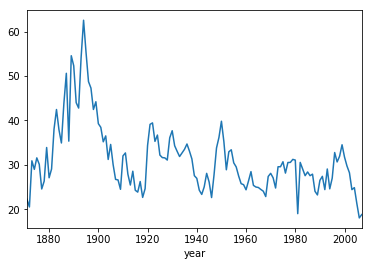

In [57]:
mean_rbis.plot()
pl.show()

In [58]:
def years_played_to_date(player):
 years_to_date = player.year - np.min(player.year) + 1
 player['years_to_date'] = years_to_date
 return player

In [59]:
# for each player, calculate the number of years played
players = baseball.groupby("id").apply(years_played_to_date)
players.ix[players.id=="ansonca01"]



/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,id,year,stint,team,lg,g,ab,r,h,X2b,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,years_to_date
0,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN,1
7,ansonca01,1872,1,PH1,NaN,46,217,60,90,10,...,6.0,6.0,16,3.0,NaN,NaN,NaN,NaN,NaN,2
20,ansonca01,1873,1,PH1,NaN,52,254,53,101,9,...,0.0,2.0,5,1.0,NaN,NaN,NaN,NaN,NaN,3
33,ansonca01,1874,1,PH1,NaN,55,259,51,87,8,...,6.0,0.0,4,1.0,NaN,NaN,NaN,NaN,NaN,4
48,ansonca01,1875,1,PH1,NaN,69,326,84,106,15,...,11.0,6.0,4,2.0,NaN,NaN,NaN,NaN,NaN,5
65,ansonca01,1876,1,CHN,NL,66,309,63,110,9,...,NaN,NaN,12,8.0,NaN,NaN,NaN,NaN,NaN,6
80,ansonca01,1877,1,CHN,NL,59,255,52,86,19,...,NaN,NaN,9,3.0,NaN,NaN,NaN,NaN,NaN,7
97,ansonca01,1878,1,CHN,NL,60,261,55,89,12,...,NaN,NaN,13,1.0,NaN,NaN,NaN,NaN,NaN,8
114,ansonca01,1879,1,CHN,NL,51,227,40,72,20,...,NaN,NaN,2,2.0,NaN,NaN,NaN,NaN,NaN,9
139,ansonca01,1880,1,CHN,NL,86,356,54,120,24,...,NaN,NaN,14,12.0,NaN,NaN,NaN,NaN,NaN,10


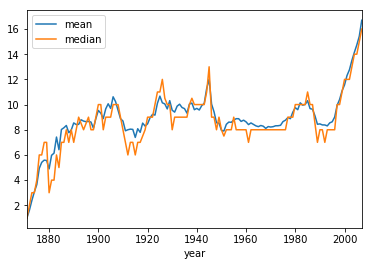

In [60]:
players.groupby("year").aggregate([np.mean, np.median]).years_to_date.plot()
pl.show()

In [61]:
#############
# Iris data #
#############

In [62]:
import pandas as pd
from sklearn.datasets import load_iris


In [63]:
iris = load_iris()

In [64]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# apply
cols = df.columns[0:4]
cols

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [66]:
# divide each numeric column by 2
df[cols].apply(lambda x: x / 2).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.55,1.75,0.70,0.1
1,2.45,1.50,0.70,0.1
2,2.35,1.60,0.65,0.1
3,2.30,1.55,0.75,0.1
4,2.50,1.80,0.70,0.1


In [67]:
# divide 1 column by 2
#df.sepal_length_cm.apply(lambda x: x / 2).head()
df["sepal length (cm)"].apply(lambda x: x / 2).head()


0    2.55
1    2.45
2    2.35
3    2.30
4    2.50
Name: sepal length (cm), dtype: float64

In [68]:
#############
# New data  #
#############

In [69]:
from dateutil.parser import parse
import pandas as pd


In [70]:
# monthly slaughter records since 1921
df = pd.read_csv("http://bit.ly/119792b")

In [71]:
df.shape

(827, 8)

In [72]:
df.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01 00:00:00,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01 00:00:00,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01 00:00:00,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01 00:00:00,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [73]:
# parse the data (we could also use pd.to_datetime)
df.date = df.date.apply(parse)

In [74]:
df.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [75]:
# sort the data frame by date
df = df.sort_values(['date'])

In [76]:
# create an index
df.index = df.date

In [77]:
# fill months without data with 0s
df = df.fillna(0)

In [78]:
df.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,,
1944-01-01,1944-01-01,751.0,85.0,1280.0,89.0,0.0,0.0,0.0
1944-02-01,1944-02-01,713.0,77.0,1169.0,72.0,0.0,0.0,0.0
1944-03-01,1944-03-01,741.0,90.0,1128.0,75.0,0.0,0.0,0.0
1944-04-01,1944-04-01,650.0,89.0,978.0,66.0,0.0,0.0,0.0
1944-05-01,1944-05-01,681.0,106.0,1029.0,78.0,0.0,0.0,0.0


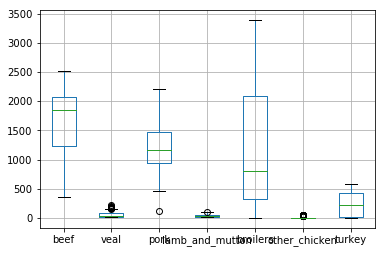

In [79]:
# built in boxplot method
df.boxplot()
pl.show()

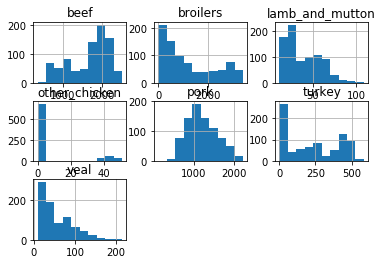

In [80]:
# built in histogram method
df.hist()
pl.show()

In [81]:
# let's make a time series plot of just the most popular
cols = ["beef", "pork", "turkey", "broilers"]
cols

['beef', 'pork', 'turkey', 'broilers']

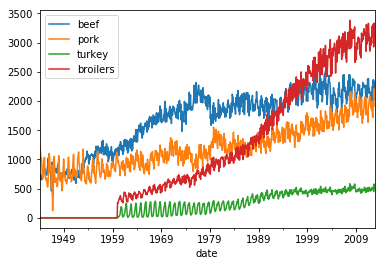

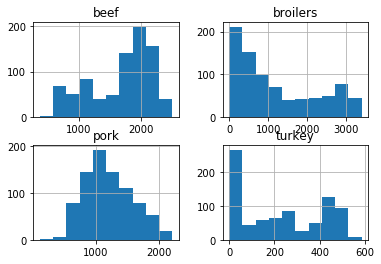

In [82]:
df[cols].plot()
df[cols].hist()
# note that since the data frame is indexed, 
# pandas automatically renders the plot w/ a date for the x-axis
pl.show()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


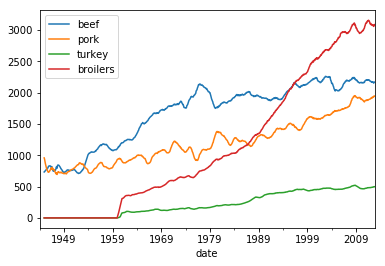

In [83]:
# add a 12 month moving average
df[cols].apply(lambda x: pd.rolling_mean(x, 12)).plot()
pl.show()

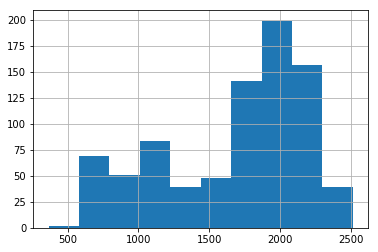

In [84]:
df['beef'].hist()
pl.show()

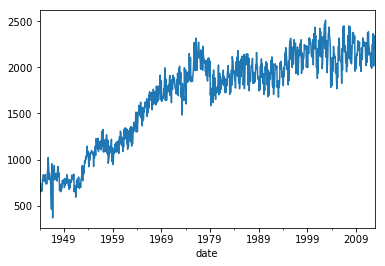

In [85]:
df['beef'].plot()
pl.show()

In [86]:
import pandas as pd
import numpy as np
from datetime import datetime

In [87]:
# generate some fake tick data with 1 million observations
n = 1000000
df = pd.DataFrame({
 "timestamp": [datetime.now() for t in range(n)],
 "value": np.random.uniform(-1, 1, n)})

In [88]:
df.head()

,timestamp,value
0,2017-11-05 23:07:43.642921,-0.998818
1,2017-11-05 23:07:43.642932,0.239365
2,2017-11-05 23:07:43.642935,0.513261
3,2017-11-05 23:07:43.642937,-0.083531
4,2017-11-05 23:07:43.642939,-0.784417


In [89]:
# similar dataframe operations to R
df.describe()


,value
count,1000000.000000
mean,-0.001575
std,0.577406
min,-0.999999
25%,-0.501877
50%,-0.002089
75%,0.498009
max,0.999998


In [90]:
df.count()


timestamp    1000000
value        1000000
dtype: int64

In [91]:
# creating an index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['value'] = df['value'].cumsum()
df.index = df['timestamp']